In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns
import numpy as np

In [55]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = '../SimHei.ttf'  # 替换为你的字体文件路径
font = FontProperties(fname=font_path, size=16)

In [ ]:
cols = ['制造商','产品名称','地区','省/自治区','子类别','类别','折扣','数量','细分','产品描述']

In [102]:
filepath = '../preprocessed_supermarket.xlsx'
df = pd.read_excel(filepath)
print(df)

       利润率         制造商   产品名称    利润       发货日期  地区  城市  子类别   折扣  数量 省/自治区  \
0    -0.47     Fiskars     剪刀   -61 2016-04-29  华东  杭州   用品  0.4   2    浙江   
1     0.34   GlobeWeis   搭扣信封    43 2016-06-19  西南  内江   信封  0.0   2    四川   
2     0.13    Cardinal  孔加固材料     4 2016-06-19  西南  内江  装订机  0.4   2    四川   
3    -0.08    Kleencut    开信刀   -27 2016-12-13  华东  镇江   用品  0.4   4    江苏   
4     0.40  KitchenAid    搅拌机   550 2015-06-02  中南  汕头   器具  0.0   3    广东   
...    ...         ...    ...   ...        ...  ..  ..  ...  ...  ..   ...   
9930 -0.33     SanDisk    记忆卡  -315 2016-06-02  华东  义乌   配件  0.4   3    浙江   
9931  0.08       Eldon      盘    36 2016-06-02  华东  义乌  收纳具  0.0   2    浙江   
9932 -0.37       Safco    折叠椅   -88 2016-06-02  华东  义乌   椅子  0.4   1    浙江   
9933 -0.33          罗技    路由器 -1617 2016-06-02  华东  义乌   配件  0.4   7    浙江   
9934 -0.48    Breville     冰箱 -3502 2013-12-06  华东  温州   器具  0.4   5    浙江   

        类别   细分       订单日期 邮寄方式   销售额 订单国家     订单编号 产品描述  
0   

## 用户所在省/自治区

In [5]:
province_company = {}
province_customer = {}
province_enterprice = {}
for i in range(df.shape[0]):
    if df["细分"][i] == "公司":
        if df["省/自治区"][i] not in province_company:
            province_company[df["省/自治区"][i]] = df["数量"][i]
        else:
            province_company[df["省/自治区"][i]] += df["数量"][i]
    elif df["细分"][i] == "消费者":
        if df["省/自治区"][i] not in province_customer:
            province_customer[df["省/自治区"][i]] = df["数量"][i]
        else:
            province_customer[df["省/自治区"][i]] += df["数量"][i]
    else:
        if df["省/自治区"][i] not in province_enterprice:
            province_enterprice[df["省/自治区"][i]] = df["数量"][i]
        else:
            province_enterprice[df["省/自治区"][i]] += df["数量"][i]

In [8]:
province = list(province_company.keys())
company = []
customer = []
enterprice = []
for each in province:
    company.append(province_company[each])
    customer.append(province_customer[each])
    if each == "青海": #青海的消费群体中没有小型企业
        enterprice.append(0)
    else:
        enterprice.append(province_enterprice[each])
company = np.array(company)
enterprice = np.array(enterprice)
customer = np.array(customer)

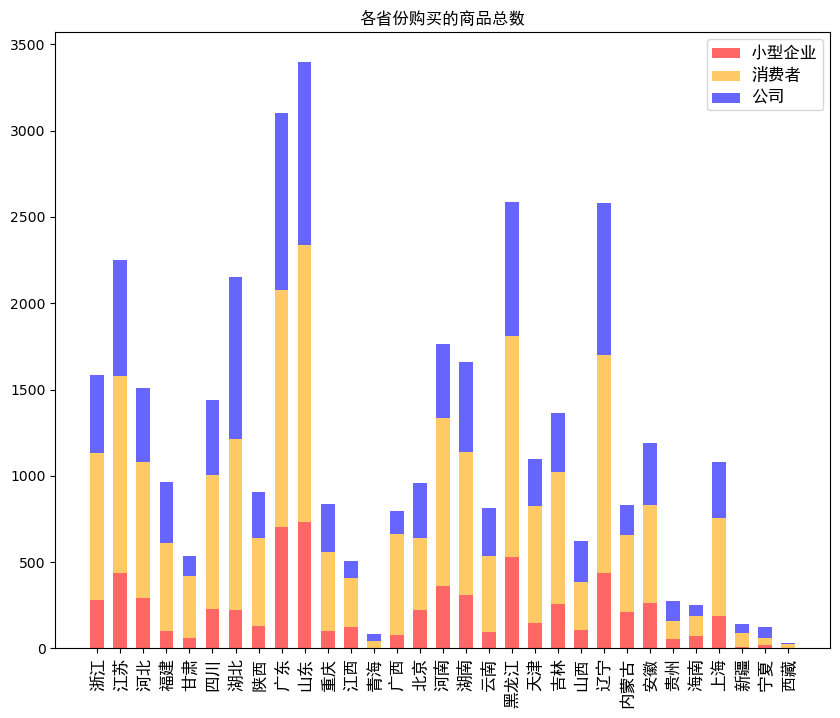

In [11]:
plt.figure(figsize=(10, 8))
width = 0.6
plt.bar(province,enterprice,width,color='red' ,alpha=0.6, label="小型企业")
plt.bar(province, customer, width, bottom=enterprice, color= 'orange', alpha=0.6, label="消费者")
plt.bar(province, company, width, bottom= (enterprice+customer), color='blue', alpha=0.6, label="公司")
plt.xticks(fontproperties=font,rotation=90)
plt.title("各省份购买的商品总数",fontproperties=font)
legend = plt.legend()
for i in range(0,3):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)
plt.show ()

## 价格和折扣

In [105]:
filepath = 'probability_info.xlsx'
df = pd.read_excel(filepath)
print(df)

            制造商 产品名称 产品描述    类别 子类别  地区 省/自治区   城市    细分       订单日期    折扣  数量  \
0      Kleencut   剪刀    钢  办公用品  用品  华北    河北  秦皇岛   消费者 2016-01-09  0.00   3   
1      Stiletto   剪刀    钢  办公用品  用品  华北    河北  秦皇岛   消费者 2016-01-02  0.00   3   
2          Acme   剪刀  锯齿状  办公用品  用品  华东    山东   即墨    公司 2016-11-09  0.40   5   
3      Stiletto   剪刀  锯齿状  办公用品  用品  华北    河北  秦皇岛    公司 2013-11-09  0.00   1   
4      Kleencut   剪刀   工业  办公用品  用品  中南    广西   钦州    公司 2015-05-31  0.40   3   
...         ...  ...  ...   ...  ..  ..   ...  ...   ...        ...   ...  ..   
11748     Bevis   木桌   黑色    家具  桌子  西南    四川   成都   消费者 2016-08-05  0.60   1   
11749     Lesro   木桌   组装    家具  桌子  中南    广东   珠海    公司 2016-12-11  0.25   3   
11750     Lesro   木桌   白色    家具  桌子  中南    广东   恩城  小型企业 2014-06-20  0.25   5   
11751     Lesro   木桌   白色    家具  桌子  中南    湖北   随州    公司 2015-11-18  0.60   2   
11752     Bevis  电脑桌   黑色    家具  桌子  华北    天津   天津    公司 2016-09-04  0.25  13   

                单价  是否购买  


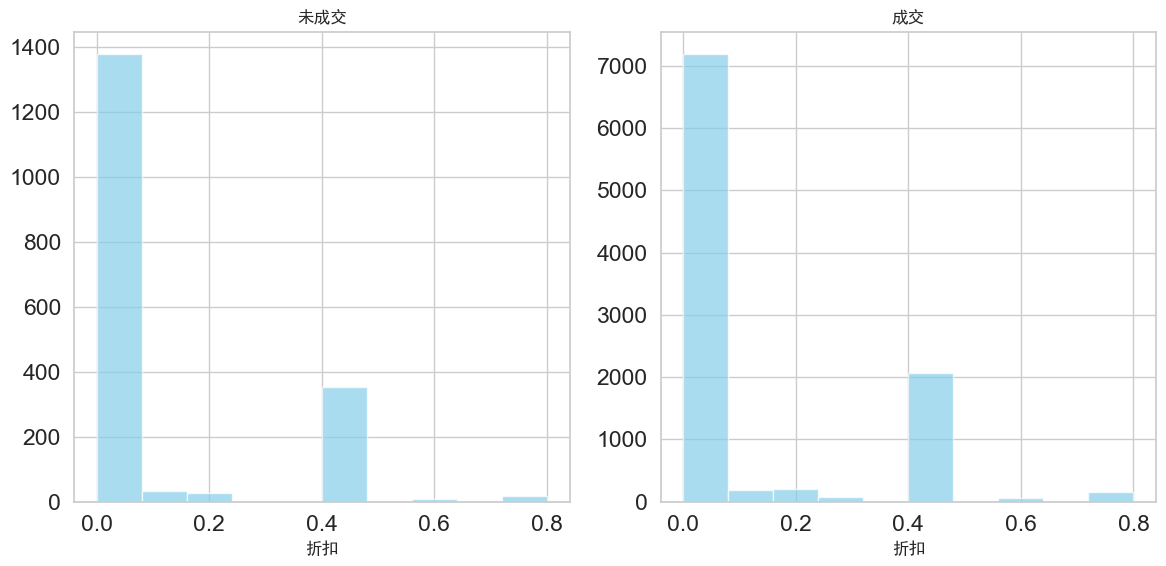

In [26]:
# 创建 6x6 的子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(df[df['是否购买']==0]['折扣'], bins=10, color='skyblue', alpha=0.7)
axes[0].set_xlabel(f'折扣',fontproperties=font)
axes[0].set_title(f'未成交',fontproperties=font)
axes[1].hist(df[df['是否购买']==1]['折扣'], bins=10, color='skyblue', alpha=0.7)
axes[1].set_xlabel(f'折扣',fontproperties=font)
axes[1].set_title(f'成交',fontproperties=font)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

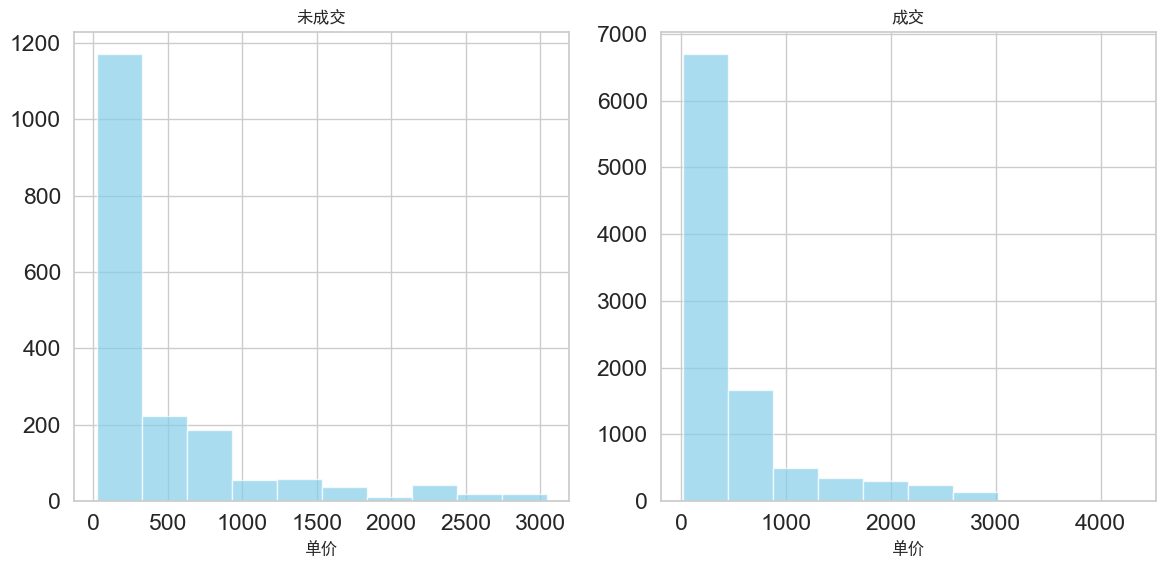

In [31]:
# 创建 6x6 的子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(df[df['是否购买']==0]['单价'], bins=10, color='skyblue', alpha=0.7)
axes[0].set_xlabel(f'单价',fontproperties=font)
axes[0].set_title(f'未成交',fontproperties=font)
axes[1].hist(df[df['是否购买']==1]['单价'], bins=10, color='skyblue', alpha=0.7)
axes[1].set_xlabel(f'单价',fontproperties=font)
axes[1].set_title(f'成交',fontproperties=font)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [47]:
pos_data=df[df['是否购买']==1][['单价','折扣']]
neg_data=df[df['是否购买']==0][['单价','折扣']]
print(pos_data['单价'])

1816      104.340789
1817      104.340789
1818      104.340789
1819      104.340789
1820      104.340789
            ...     
11742    2492.574074
11743    2190.238889
11744    2190.238889
11745    2190.238889
11746    2307.794872
Name: 单价, Length: 9931, dtype: float64


<Figure size 640x480 with 0 Axes>

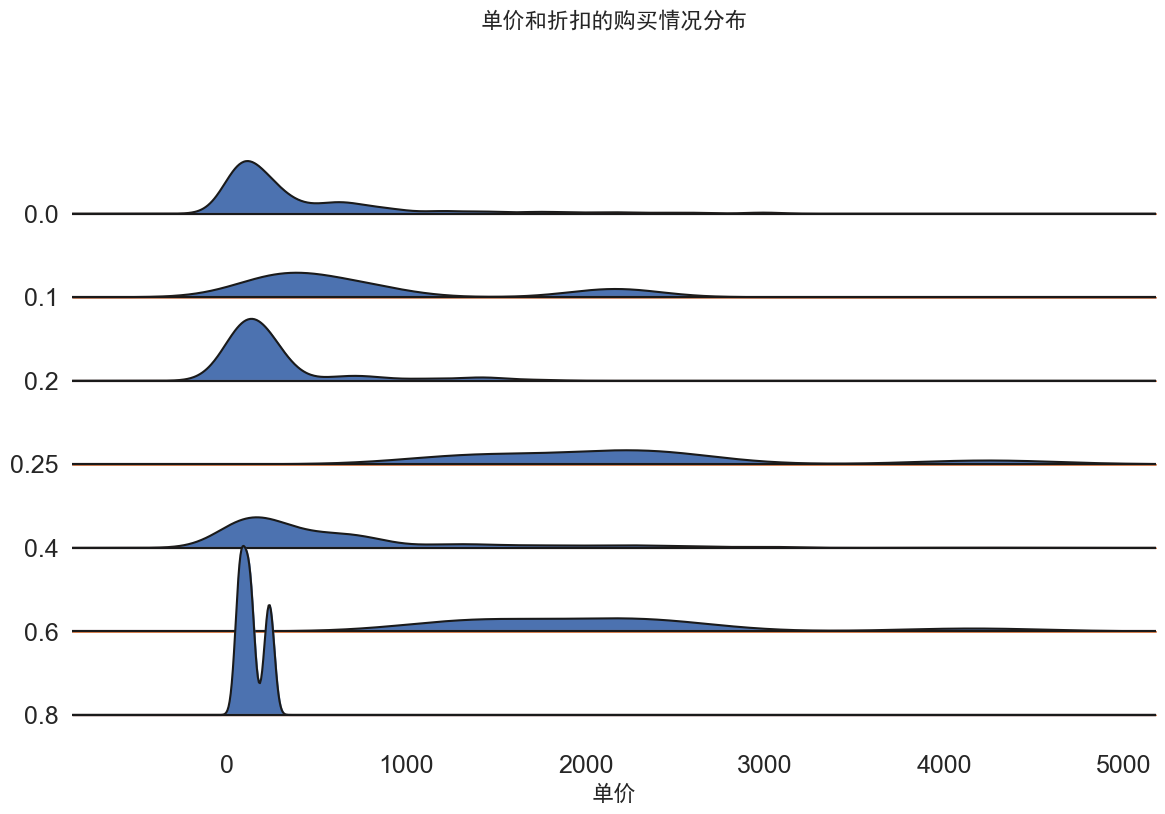

In [59]:
import joypy
# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
fig, axes = joypy.joyplot(pos_data, column=['单价', '折扣'], by="折扣", figsize=(12,8))

# Decoration\
plt.xlabel("单价",fontproperties=font)
plt.ylabel("折扣",fontproperties=font)
plt.title("单价和折扣的购买情况分布",fontproperties=font)
plt.show()

## 制造商

In [106]:
from wordcloud import WordCloud

In [101]:
df[df['是否购买']==0]

,制造商,产品名称,产品描述,类别,子类别,地区,省/自治区,城市,细分,订单日期,折扣,单价,是否购买
0,Kleencut,剪刀,钢,办公用品,用品,华北,河北,秦皇岛,消费者,2016-01-09,0.0,99.191047,0
1,Stiletto,剪刀,钢,办公用品,用品,华北,河北,秦皇岛,消费者,2016-01-02,0.0,106.528319,0
2,Acme,剪刀,锯齿状,办公用品,用品,华东,山东,即墨,公司,2016-11-09,0.4,117.379087,0
3,Stiletto,剪刀,锯齿状,办公用品,用品,华北,河北,秦皇岛,公司,2013-11-09,0.0,106.528319,0
4,Kleencut,剪刀,工业,办公用品,用品,中南,广西,钦州,公司,2015-05-31,0.4,99.191047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,Breville,搅拌机,红色,办公用品,器具,东北,辽宁,沈阳,公司,2016-06-17,0.0,419.441206,0
1812,KitchenAid,搅拌机,红色,办公用品,器具,东北,黑龙江,佳木斯,消费者,2016-01-29,0.0,460.770714,0
1813,KitchenAid,搅拌机,黑色,办公用品,器具,中南,河南,开封,公司,2013-12-14,0.0,460.770714,0
1814,Hoover,搅拌机,白色,办公用品,器具,华东,安徽,蚌埠,消费者,2015-09-25,0.0,450.762585,0


      index         制造商  数量
0         0    Kleencut   3
1         1    Stiletto   3
2         2        Acme   5
3         3    Stiletto   1
4         4    Kleencut   3
...     ...         ...  ..
1813   1813    Breville   2
1814   1814  KitchenAid   4
1815   1815  KitchenAid   2
1816   1816      Hoover   3
1817   1817    Barricks   1

[1818 rows x 3 columns]


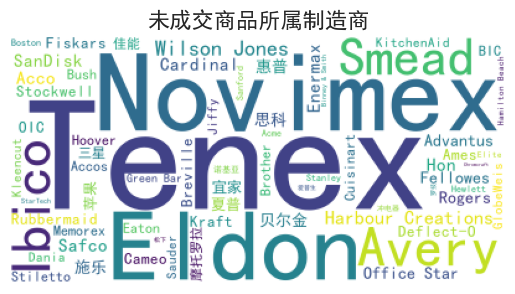

In [115]:
df2 = df[df['是否购买']==0][['制造商','数量']].reset_index()
print(df2)

frequencies = {}
for i in range(df2.shape[0]):
    if df2['制造商'][i] not in frequencies:
        frequencies[df2['制造商'][i]] = df2['数量'][i]
    else:
        frequencies[df2['制造商'][i]] += df2['数量'][i]

wc=WordCloud(font_path='../SimHei.ttf', background_color='white')
wc.generate_from_frequencies(frequencies)
plt.title("未成交商品所属制造商",fontproperties=font)
plt.imshow(wc)
plt.axis("off") # 关闭坐标轴
plt.show() 

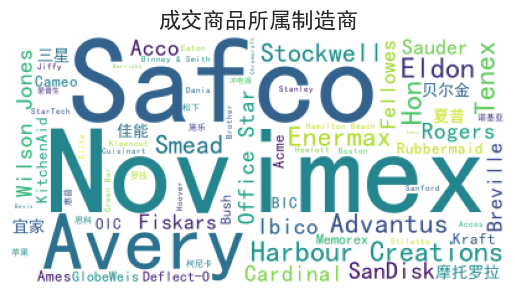

In [117]:
df2 = df[df['是否购买']==1][['制造商','数量']].reset_index()

frequencies = {}
for i in range(df2.shape[0]):
    if df2['制造商'][i] not in frequencies:
        frequencies[df2['制造商'][i]] = df2['数量'][i]
    else:
        frequencies[df2['制造商'][i]] += df2['数量'][i]

wc=WordCloud(font_path='../SimHei.ttf', background_color='white')
wc.generate_from_frequencies(frequencies)
plt.title("成交商品所属制造商",fontproperties=font)
plt.imshow(wc)
plt.axis("off") # 关闭坐标轴
plt.show() 

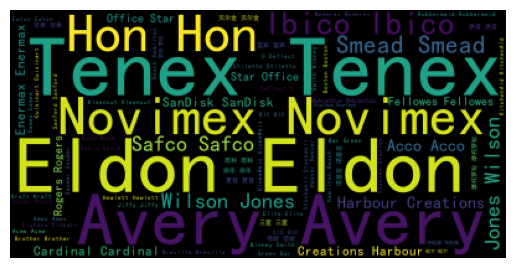

In [97]:
text = df[df['是否购买']==0]['制造商'].str.strip().values.tolist()
text.sort()
text = " ".join(text)

wd=WordCloud(font_path='../SimHei.ttf')
wd.generate(text) # 生成词云
plt.imshow(wd)
plt.axis("off") # 关闭坐标轴
plt.show() 


# 创建词云对象
#wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
# 显示词云图
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.margins(x=0, y=0)
#plt.show()

TypeError: can only join an iterable

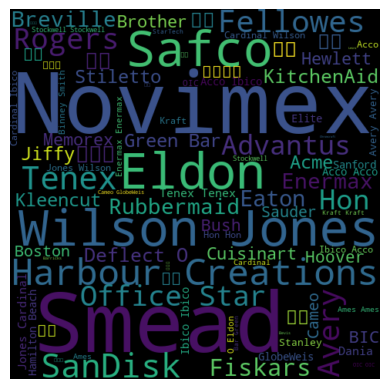

In [74]:
text = df[df['是否购买']==0]['制造商'].values.tolist()
text = " ".join(text)
# 创建词云对象
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()